In [2]:
# Constants used in the program:
# URL_DATA_FOLDER is where all the data  is saved.
URL_DATA_FOLDER = "./"

# ALEXA TOP 1M file
ALEXA_TOP_1M_FILEPATH = "./alexa-top1m-2020-09-03_0900_UTC.csv"

# CDF_FILE_OUTPUT is where the CDF graph will be outputted to
CDF_FILE_OUTPUT = 'test.pdf'

In [3]:
import json 
import os

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [5]:
# Alexa top 1m sorted by popularity
popularity_list = []
with open(ALEXA_TOP_1M_FILEPATH, 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        popularity_list.append(line.split(",")[1])

In [6]:
# From output:
# website_url + "$$" + json.dumps(tracker_urls) + "$$" + json.dumps(ads_urls) + "$$" + json.dumps(other_urls)
websites = {}
for root, dirs, files in os.walk(URL_DATA_FOLDER, topdown=False):
    for name in files:
        # goes through the data generated from the branch-analysis script
        if('urls' in name):
            filePath = os.path.join(root, name)
            print(filePath)
            with open(filePath, 'r') as f:
                lines = f.read().splitlines()
                for line in lines:
                    fields = line.split("$${") # added { because of parsing issues since some url's have multiple $'s
                    url = fields[0]
                    trackers = json.loads("{" + fields[1])
                    ads = json.loads("{" + fields[2])
                    others = json.loads("{" + fields[3])
                    websites[url] = {}
                    websites[url]["trackers"] = trackers
                    websites[url]["ads"] = ads
                    websites[url]["others"] = others
                    

./13\output\urls_0.txt
./13\output\urls_1.txt
./13\output\urls_2.txt
./13\output\urls_3.txt
./13\output\urls_4.txt
./13\output\urls_5.txt
./13\output\urls_6.txt
./13\output\urls_7.txt
./14\output\urls_0.txt
./14\output\urls_1.txt
./14\output\urls_2.txt
./14\output\urls_3.txt
./14\output\urls_4.txt
./14\output\urls_5.txt
./14\output\urls_6.txt
./14\output\urls_7.txt
./15\output\urls_0.txt
./15\output\urls_1.txt
./15\output\urls_2.txt
./15\output\urls_3.txt
./15\output\urls_4.txt
./15\output\urls_5.txt
./15\output\urls_6.txt
./15\output\urls_7.txt


In [7]:
# Aggregate trackers and ads by truncation
popular_trackers = {}
popular_ads = {}
for website in popularity_list:
    if website in websites:
        for tracker in websites[website]["trackers"]:
            old_tracker = tracker
            tracker = tracker.split("?")[0]
            if tracker not in popular_trackers:
                popular_trackers[tracker] = {}
                popular_trackers[tracker]["count"] = 1
                popular_trackers[tracker]["bytes"] = websites[website]["trackers"][old_tracker]["total_bytes"]
            else:
                popular_trackers[tracker]["count"] += 1
                popular_trackers[tracker]["bytes"] += websites[website]["trackers"][old_tracker]["total_bytes"]
        for ad in websites[website]["ads"]:
            old_ad = ad
            ad = ad.split("?")[0]
            if ad not in popular_ads:
                popular_ads[ad] = {}
                popular_ads[ad]["count"] = 1
                popular_ads[ad]["bytes"] = websites[website]["ads"][old_ad]["total_bytes"]
            else:
                popular_ads[ad]["count"] += 1
                popular_ads[ad]["bytes"] += websites[website]["ads"][old_ad]["total_bytes"]


In [8]:
for ad in popular_ads:
    if popular_ads[ad]["count"] >= 10000:
        print(ad)
print("====================================================")
for tracker in popular_trackers:
    if popular_trackers[tracker]["count"] >= 10000:
        print(tracker)

https://securepubads.g.doubleclick.net/gampad/ads
https://tpc.googlesyndication.com/safeframe/1-0-37/html/container.html
https://securepubads.g.doubleclick.net/tag/js/gpt.js
https://securepubads.g.doubleclick.net/gpt/pubads_impl_2020092201.js
https://securepubads.g.doubleclick.net/pcs/view
https://pagead2.googlesyndication.com/getconfig/sodar
https://tpc.googlesyndication.com/sodar/sodar2.js
https://tpc.googlesyndication.com/sodar/sodar2/216/runner.html
https://securepubads.g.doubleclick.net/pagead/adview
https://tpc.googlesyndication.com/sodar/sodar2/217/runner.html
https://pagead2.googlesyndication.com/pagead/js/r20200923/r20190131/show_ads_impl_fy2019.js
https://googleads.g.doubleclick.net/pagead/html/r20200923/r20190131/zrt_lookup.html
https://googleads.g.doubleclick.net/pagead/ads
https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js
https://pagead2.googlesyndication.com/pagead/gen_204
https://www.googleadservices.com/pagead/conversion.js
https://pagead2.googlesyndication

# Two ways I think I can approach this
## 1) we graph popularity on the bottom, then numbers of ads/trackers as y axis
## 2) we get the top 10 trackers, then track their counts throughout the popularity (x axis = popularity, y axis = count for top# tracker, 10 graphs total)

I will be looking at Approach 1 in this notebook

# Approach 1

In [9]:
# Approach 1
count_trackers_list = []
count_ads_list = []

for website in popularity_list:
    if website in websites:
        count_trackers_list.append(len(websites[website]["trackers"]))
        count_ads_list.append(len(websites[website]["ads"]))

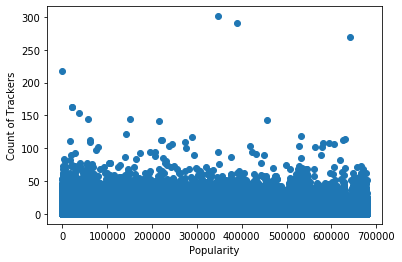

In [10]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_list), 1))
plt.plot(x, count_trackers_list, 'o')

plt.ylabel("Count of Trackers")
plt.xlabel("Popularity")


plt.savefig("./tracker_count_based_on_popularity.pdf", format='pdf')
plt.show()

## What if each point was a 1k bucket? 673 total buckets

In [11]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
tracker_per_1000_count = 0
count_trackers_by_1000_list = []
for tracker_count in count_trackers_list:
    tracker_per_1000_count += tracker_count
    if count % 1000 == 0:
        count_trackers_by_1000_list.append(tracker_per_1000_count)
        tracker_per_1000_count = 0
        
    count += 1

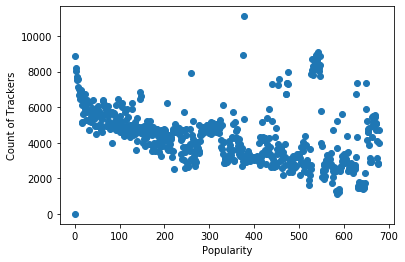

In [12]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_by_1000_list), 1))
plt.plot(x, count_trackers_by_1000_list, 'o')

plt.ylabel("Count of Trackers")
plt.xlabel("Popularity")

# sets the ticks on the axes
plt.show()

## What if each bucket was 10k? with 67 buckets?

In [55]:
count = 0
tracker_per_10000_count = 0
count_trackers_by_10000_list = []
for tracker_count in count_trackers_list:
    tracker_per_10000_count += tracker_count
    if count % 10000 == 0:
        count_trackers_by_10000_list.append(tracker_per_10000_count)
        tracker_per_10000_count = 0
        
    count += 1

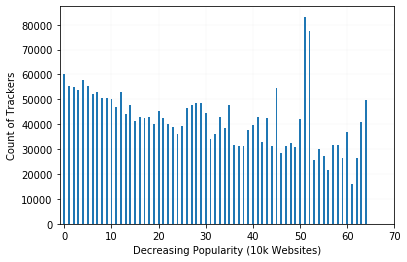

In [58]:
fig, ax = plt.subplots()

count_trackers_by_10000_list = count_trackers_by_10000_list[1:]
x = list(range(0,len(count_trackers_by_10000_list), 1))
plt.bar(x, count_trackers_by_10000_list, width=0.4)
plt.ylabel("Count of Trackers")
plt.xlabel("Decreasing Popularity (10k Websites)")


# limits the domain and range of graph to [0,1]
plt.xlim([-1,70])
# plt.ylim([0,60000])

# adds a gray grid for readability
ax.set_axisbelow(True)
plt.grid(color='#888888', linestyle=':', linewidth=0.1)

plt.savefig("./tracker_count_based_on_popularity.pdf", format='pdf')
plt.show()

## How about ads?

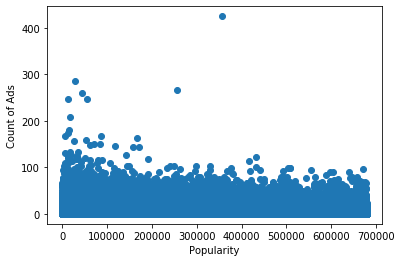

In [15]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_ads_list), 1))
plt.plot(x, count_ads_list, 'o')

plt.ylabel("Count of Ads")
plt.xlabel("Popularity")

plt.show()

## Now buckets of 1k?

In [16]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
ad_per_1000_count = 0
count_ads_by_1000_list = []
for ad_count in count_ads_list:
    ad_per_1000_count += ad_count
    if count % 1000 == 0:
        count_ads_by_1000_list.append(ad_per_1000_count)
        ad_per_1000_count = 0
        
    count += 1

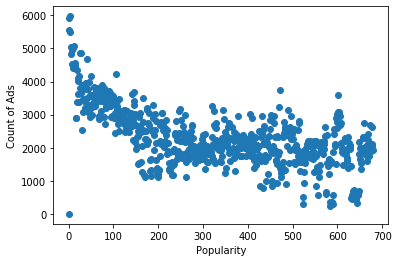

In [17]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_ads_by_1000_list), 1))
plt.plot(x, count_ads_by_1000_list, 'o')

plt.ylabel("Count of Ads")
plt.xlabel("Popularity")
plt.show()

## Now buckets of 10k?

In [18]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
ad_per_10000_count = 0
count_ads_by_10000_list = []
for ad_count in count_ads_list:
    ad_per_10000_count += ad_count
    if count % 10000 == 0:
        count_ads_by_10000_list.append(ad_per_10000_count)
        ad_per_10000_count = 0
        
    count += 1
count_ads_by_10000_list.append(ad_per_10000_count)
count_ads_by_10000_list.pop(0)

0

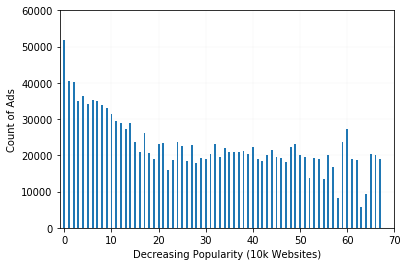

In [59]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

# Makes the font sanserif and sets the size to 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

x = list(range(0,len(count_ads_by_10000_list), 1))
plt.bar(x, count_ads_by_10000_list, width=0.4)

plt.ylabel("Count of Ads")
plt.xlabel("Decreasing Popularity (10k Websites)")


# limits the domain and range of graph to [0,1]
plt.xlim([-1,70])
plt.ylim([0,60000])

# adds a gray grid for readability
ax.set_axisbelow(True)
plt.grid(color='#888888', linestyle=':', linewidth=0.1)

plt.savefig("./ads_count_based_on_popularity.pdf", format='pdf')
plt.show()

# How about we convert them to bytes?

In [20]:
# Approach 1
count_trackers_bytes_list = []
count_ads_bytes_list = []

for website in popularity_list:
    if website in websites:
        tracker_byte_count = 0
        for tracker in websites[website]["trackers"]:
            tracker_byte_count += websites[website]["trackers"][tracker]["total_bytes"]
        count_trackers_bytes_list.append(tracker_byte_count)
        
        ad_byte_count = 0
        for ad in websites[website]["ads"]:
            ad_byte_count += websites[website]["ads"][ad]["total_bytes"]
        count_ads_bytes_list.append(ad_byte_count)

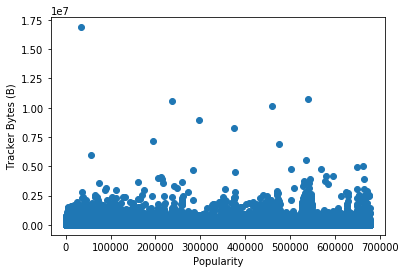

In [21]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_bytes_list), 1))
plt.plot(x, count_trackers_bytes_list, 'o')

plt.ylabel("Tracker Bytes (B)")
plt.xlabel("Popularity")

plt.show()

## 1k buckets of tracker bytes

In [22]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
tracker_bytes_per_1000_count = 0
count_trackers_bytes_by_1000_list = []
for tracker_bytes_count in count_trackers_bytes_list:
    tracker_bytes_per_1000_count += tracker_bytes_count
    if count % 1000 == 0:
        count_trackers_bytes_by_1000_list.append(tracker_bytes_per_1000_count)
        tracker_bytes_per_1000_count = 0
        
    count += 1

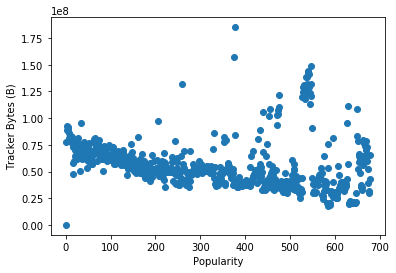

In [23]:
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_bytes_by_1000_list), 1))
plt.plot(x, count_trackers_bytes_by_1000_list, 'o')

plt.ylabel("Tracker Bytes (B)")
plt.xlabel("Popularity")

plt.show()

## 10k bucket for tracker bytes

In [24]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
tracker_bytes_per_10000_count = 0
count_trackers_bytes_by_10000_list = []
for tracker_bytes_count in count_trackers_bytes_list:
    tracker_bytes_per_10000_count += tracker_bytes_count
    if count % 10000 == 0:
        count_trackers_bytes_by_10000_list.append(tracker_bytes_per_10000_count)
        tracker_bytes_per_10000_count = 0
        
    count += 1

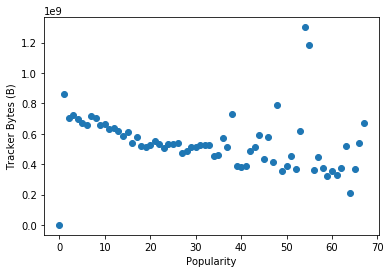

In [25]:
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_bytes_by_10000_list), 1))
plt.plot(x, count_trackers_bytes_by_10000_list, 'o')

plt.ylabel("Tracker Bytes (B)")
plt.xlabel("Popularity")

plt.show()

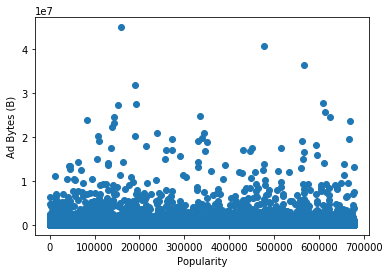

In [26]:
fig, ax = plt.subplots()

x = list(range(0,len(count_ads_bytes_list), 1))
plt.plot(x, count_ads_bytes_list, 'o')
plt.ylabel("Ad Bytes (B)")
plt.xlabel("Popularity")

plt.show()

## 1k bucket for ad bytes

In [27]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
ad_bytes_per_1000_count = 0
count_ads_bytes_by_1000_list = []
for ad_bytes_count in count_ads_bytes_list:
    ad_bytes_per_1000_count += ad_bytes_count
    if count % 1000 == 0:
        count_ads_bytes_by_1000_list.append(ad_bytes_per_1000_count)
        ad_bytes_per_1000_count = 0
        
    count += 1

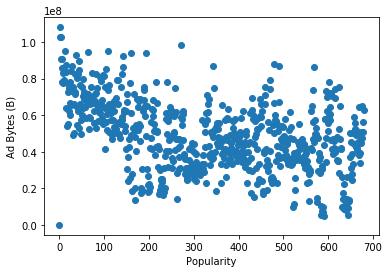

In [28]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_ads_bytes_by_1000_list), 1))
plt.plot(x, count_ads_bytes_by_1000_list, 'o')

plt.ylabel("Ad Bytes (B)")
plt.xlabel("Popularity")

plt.show()

## 10k bucket for ad bytes

In [29]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
ad_bytes_per_10000_count = 0
count_ads_bytes_by_10000_list = []
for ad_bytes_count in count_ads_bytes_list:
    ad_bytes_per_10000_count += ad_bytes_count
    if count % 10000 == 0:
        count_ads_bytes_by_10000_list.append(ad_bytes_per_10000_count)
        ad_bytes_per_10000_count = 0
        
    count += 1

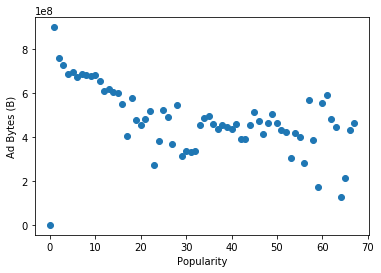

In [30]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_ads_bytes_by_10000_list), 1))
plt.plot(x, count_ads_bytes_by_10000_list, 'o')

plt.ylabel("Ad Bytes (B)")
plt.xlabel("Popularity")

plt.show()

# Approach 1b
What if we truncated each count of a tracker/ad domain such that everything after "?" is considered just data and we only care about everything before the "?"?

In [31]:
# Approach 1b
count_trackers_1b_list = []
count_ads_1b_list = []


for website in popularity_list:
    set_of_trackers = set()
    set_of_ads = set()
    if website in websites:
        for tracker_domain in websites[website]["trackers"]:
            set_of_trackers.add(tracker_domain.split("?")[0])
        for ad_domain in websites[website]["ads"]:
            set_of_ads.add(ad_domain.split("?")[0])
        count_trackers_1b_list.append(len(set_of_trackers))
        count_ads_1b_list.append(len(set_of_ads))

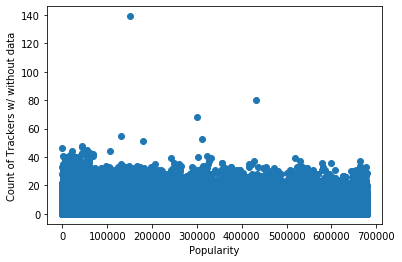

In [32]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_1b_list), 1))
plt.plot(x, count_trackers_1b_list, 'o')

plt.ylabel("Count of Trackers w/ without data")
plt.xlabel("Popularity")

plt.show()

In [33]:
## 10k?

In [34]:
#What if each point was a 1k bucket? 673 total buckets
count = 0
tracker_per_10000_count = 0
count_1b_trackers_by_10000_list = []
print(len(count_trackers_1b_list))
for tracker_count in count_trackers_1b_list:
    tracker_per_10000_count += tracker_count
    if count % 10000 == 0:
        count_1b_trackers_by_10000_list.append(tracker_per_10000_count)
        tracker_per_10000_count = 0
        
    count += 1

count_1b_trackers_by_10000_list.append(tracker_per_10000_count)
count_1b_trackers_by_10000_list.pop(0) # remove the first element which is 0.

679035


0

Buckets: 68


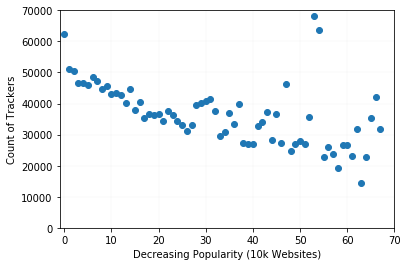

In [35]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

# Makes the font sanserif and sets the size to 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

x = list(range(0,len(count_1b_trackers_by_10000_list), 1))
plt.plot(x, count_1b_trackers_by_10000_list, 'o')

plt.ylabel("Count of Trackers")
plt.xlabel("Decreasing Popularity (10k Websites)")


# limits the domain and range of graph to [0,1]
print("Buckets:", len(count_1b_trackers_by_10000_list))
plt.xlim([-1,70])
plt.ylim([0,70000])

# adds a gray grid for readability
ax.set_axisbelow(True)
plt.grid(color='#888888', linestyle=':', linewidth=0.1)

# plt.savefig("./tracker_count_based_on_popularity.pdf", format='pdf')
plt.show()

In [36]:
print(count_1b_trackers_by_10000_list[53:55])

[68279, 63754]


# Upon seeing the very weird 540-560k jump, I will approach two avenues in addition to Approach 2.
1. For each bucket, look at the popular trackers/ads
2. Look at what 520k-540k display specifically

Then I will do approach 2 in another ipynb, popularity_graphs_approach2.ipynb.

# Below, I will take a look at the top ten trackers in each bucket (NOT Top 10 tracker files)

In [37]:
# obtain each bucket's most popular trackers (with removed data after ?...)
bucket_trackers_popularity_by_10k = [dict()]
count = 0
bucket_pos = 0
for website in popularity_list:
    if website in websites:
        gone_through = set()
        for tracker in websites[website]["trackers"]:
            tracker_url = tracker.split("?")[0]
#         count_trackers_list.append(len(websites[website]["trackers"]))
#         count_ads_list.append(len(websites[website]["ads"]))
            if(tracker_url in gone_through):
                continue
            
            if tracker_url not in bucket_trackers_popularity_by_10k[bucket_pos]:
                bucket_trackers_popularity_by_10k[bucket_pos][tracker_url] = {}
                bucket_trackers_popularity_by_10k[bucket_pos][tracker_url] = 1
            else:
                bucket_trackers_popularity_by_10k[bucket_pos][tracker_url] += 1
            
            gone_through.add(tracker_url)
                
        
        
        if count % 10000 == 0:
            bucket_pos += 1
            bucket_trackers_popularity_by_10k.append(dict());
            
            
        
        count += 1
        

In [38]:
count = 0
for tracker_count_dict in bucket_trackers_popularity_by_10k:
    if(count == 0):
        count += 1
        continue
    total_tracker_count = 0
    for tracker in tracker_count_dict:
        total_tracker_count += tracker_count_dict[tracker]
    print("Top " + str(count-1) + "0-" + str(count) + "0k Websites in Popularity")
    print("Total tracker count: ", total_tracker_count)
    print("====Top 10 Trackers in this Bucket====")
    sorted_dict_for_this_bucket = dict(sorted(tracker_count_dict.items(), key=lambda tracker_url: tracker_url[1], reverse=True))
    top_10_trackers = list(sorted_dict_for_this_bucket.keys())[:10]
    for url in top_10_trackers:
        print(url, sorted_dict_for_this_bucket[url])
    print('------------------------------------------------------------------')
    count += 1
    

Top 00-10k Websites in Popularity
Total tracker count:  62299
====Top 10 Trackers in this Bucket====
https://www.google-analytics.com/analytics.js 6425
https://stats.g.doubleclick.net/j/collect 4613
https://www.googletagmanager.com/gtm.js 3649
https://www.googletagmanager.com/gtag/js 2461
https://www.google-analytics.com/collect 2181
https://www.googleadservices.com/pagead/conversion_async.js 1839
https://www.google-analytics.com/gtm/js 991
https://certify.alexametrics.com/atrk.gif 895
https://bat.bing.com/bat.js 855
https://bat.bing.com/action/0 833
------------------------------------------------------------------
Top 10-20k Websites in Popularity
Total tracker count:  51126
====Top 10 Trackers in this Bucket====
https://www.google-analytics.com/analytics.js 5942
https://stats.g.doubleclick.net/j/collect 4186
https://www.googletagmanager.com/gtm.js 2987
https://www.googletagmanager.com/gtag/js 2335
https://www.google-analytics.com/collect 1814
https://www.googleadservices.com/pagead/

https://www.google-analytics.com/analytics.js 5919
https://stats.g.doubleclick.net/j/collect 3752
https://www.googletagmanager.com/gtag/js 2836
https://www.googletagmanager.com/gtm.js 1938
https://www.google-analytics.com/collect 1447
https://www.googleadservices.com/pagead/conversion_async.js 1099
https://pixel.wp.com/g.gif 684
https://cdn.shopify.com/shopifycloud/boomerang/shopify-boomerang-1.0.0.min.js 424
https://ssl.google-analytics.com/ga.js 415
https://ssl.google-analytics.com/r/__utm.gif 391
------------------------------------------------------------------
Top 180-190k Websites in Popularity
Total tracker count:  36583
====Top 10 Trackers in this Bucket====
https://www.google-analytics.com/analytics.js 6110
https://stats.g.doubleclick.net/j/collect 3906
https://www.googletagmanager.com/gtag/js 2694
https://www.googletagmanager.com/gtm.js 2056
https://www.google-analytics.com/collect 1654
https://www.googleadservices.com/pagead/conversion_async.js 1231
https://cdn.shopify.com/s

https://www.google-analytics.com/analytics.js 4554
https://mc.yandex.ru/metrika/advert.gif 3485
https://stats.g.doubleclick.net/j/collect 2344
https://www.googletagmanager.com/gtag/js 2308
https://mc.yandex.ru/metrika/tag.js 2052
https://mc.yandex.ru/metrika/watch.js 1795
https://www.googletagmanager.com/gtm.js 1294
https://counter.yadro.ru/hit 980
https://www.google-analytics.com/collect 857
https://top-fwz1.mail.ru/counter 575
------------------------------------------------------------------
Top 480-490k Websites in Popularity
Total tracker count:  24764
====Top 10 Trackers in this Bucket====
https://www.google-analytics.com/analytics.js 4804
https://stats.g.doubleclick.net/j/collect 2547
https://www.googletagmanager.com/gtag/js 2450
https://www.googletagmanager.com/gtm.js 1112
https://www.google-analytics.com/collect 954
https://www.googleadservices.com/pagead/conversion_async.js 606
https://pixel.wp.com/g.gif 567
https://ssl.google-analytics.com/ga.js 302
https://stats.wp.com/e-20

In [39]:
# obtain each bucket's most popular ads (with removed data after ?...)
bucket_ads_popularity_by_10k = [dict()]
count = 0
bucket_pos = 0
for website in popularity_list:
    if website in websites:
        gone_through = set()
        for ad in websites[website]["ads"]:
            ad_url = ad.split("?")[0]
            if(ad_url in gone_through):
                continue
            
            if ad_url not in bucket_ads_popularity_by_10k[bucket_pos]:
                bucket_ads_popularity_by_10k[bucket_pos][ad_url] = {}
                bucket_ads_popularity_by_10k[bucket_pos][ad_url] = 1
            else:
                bucket_ads_popularity_by_10k[bucket_pos][ad_url] += 1
            
            gone_through.add(ad_url)
                
        
        
        if count % 10000 == 0:
            bucket_pos += 1
            bucket_ads_popularity_by_10k.append(dict());
            
            
        
        count += 1
        

In [40]:
count = 0
for ad_count_dict in bucket_ads_popularity_by_10k:
    if(count == 0):
        count += 1
        continue
    total_ad_count = 0
    for ad in ad_count_dict:
        total_ad_count += ad_count_dict[ad]
    print("Top " + str(count-1) + "0-" + str(count) + "0k Websites in Popularity")
    print("Total ad count: ", total_ad_count)
    print("====Top 10 Ads in this Bucket====")
    sorted_dict_for_this_bucket = dict(sorted(ad_count_dict.items(), key=lambda ad_url: ad_url[1], reverse=True))
    top_10_ads = list(sorted_dict_for_this_bucket.keys())[:10]
    for url in top_10_ads:
        if("google" not in url):
            print("NOT GOOGLE:", url)
        print(url, sorted_dict_for_this_bucket[url])
    print('------------------------------------------------------------------')
    count += 1
    

Top 00-10k Websites in Popularity
Total ad count:  39497
====Top 10 Ads in this Bucket====
NOT GOOGLE: https://securepubads.g.doubleclick.net/gampad/ads
https://securepubads.g.doubleclick.net/gampad/ads 1526
https://tpc.googlesyndication.com/safeframe/1-0-37/html/container.html 1520
https://pagead2.googlesyndication.com/getconfig/sodar 1340
https://tpc.googlesyndication.com/sodar/sodar2.js 1236
NOT GOOGLE: https://securepubads.g.doubleclick.net/tag/js/gpt.js
https://securepubads.g.doubleclick.net/tag/js/gpt.js 1084
https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js 975
NOT GOOGLE: https://securepubads.g.doubleclick.net/gpt/pubads_impl_2020092201.js
https://securepubads.g.doubleclick.net/gpt/pubads_impl_2020092201.js 952
https://pagead2.googlesyndication.com/pagead/gen_204 912
NOT GOOGLE: https://securepubads.g.doubleclick.net/pcs/view
https://securepubads.g.doubleclick.net/pcs/view 858
https://googleads.g.doubleclick.net/pagead/ads 812
--------------------------------------

https://googleads.g.doubleclick.net/pagead/html/r20200924/r20190131/zrt_lookup.html 600
https://googleads.g.doubleclick.net/pagead/html/r20200923/r20190131/zrt_lookup.html 595
https://pagead2.googlesyndication.com/pagead/js/r20200924/r20190131/show_ads_impl_fy2019.js 593
https://pagead2.googlesyndication.com/pagead/js/r20200923/r20190131/show_ads_impl_fy2019.js 591
------------------------------------------------------------------
Top 350-360k Websites in Popularity
Total ad count:  16368
====Top 10 Ads in this Bucket====
https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js 1191
https://googleads.g.doubleclick.net/pagead/ads 1140
https://pagead2.googlesyndication.com/getconfig/sodar 1068
https://tpc.googlesyndication.com/sodar/sodar2.js 1033
https://pagead2.googlesyndication.com/pagead/gen_204 787
https://tpc.googlesyndication.com/sodar/sodar2/216/runner.html 576
https://pagead2.googlesyndication.com/pagead/js/r20200923/r20190131/show_ads_impl_fy2019.js 516
https://googleads.

In [41]:
# obtain each bucket's most popular trackers (with removed data after ?...)
count = 0
count_ru = 0
for website in popularity_list:
    if website in websites:
        if count < 550000 and count > 530000:
            if(".ru" in website[-3:]):
                count_ru += 1
            
            
        
        count += 1
print(count_ru)

11922
